In [1]:
def plot_performance_profiles(all_results, methods,level):
    method_names = list(methods.keys())
    num_methods = len(method_names)
    # Initialize performance profile data
    rho_values = np.logspace(0, 7, 100, base=2) 
    performance_data = {method: np.zeros_like(rho_values) for method in method_names}
    for  results in all_results:
        # Get the minimum function value achieved by any method
        f_min = min(results[method] for method in method_names)
        # Compute performance ratios
        ratios = {}
        for method in method_names:
            f_values = results[method]
            ratios[method] =f_values / f_min
        # Update performance data
        for i, rho in enumerate(rho_values):
            for method in method_names:
                performance_data[method][i] += np.sum(np.array(ratios[method]) <= rho)
    # Normalize the performance data
    for method in method_names:
        performance_data[method] /= len(all_results)
    # Plot performance profiles
    plt.figure(figsize=(8, 6))
    for method in method_names:
        if method=='GDF':
            name='DFD'
        else:
            name=method
        plt.plot(rho_values, performance_data[method], label=name,marker='x')
    plt.xlabel('Performance Ratio',fontsize=18)
    title = f"Noise level: {level}"
    plt.title(title,fontsize=24)
    plt.xscale('log', base=2)
    plt.legend(fontsize=18, loc='lower right')
    tick_locations = [1, 2, 4, 8, 16, 32,64,128]
    tick_labels = [str(tick) for tick in tick_locations]
    plt.xticks(tick_locations, tick_labels)
    plt.tick_params(axis='both', labelsize=16)
    plt.grid(True)
    filename = "esti_C11noisy_noise=" + str(level) + ".png"
    plt.savefig("IMG/" + filename)
    plt.show()
def noise_esti(f, x, num):
    arr = [f(x)]  # Start with the exact value at x
    for _ in range(num):  # Loop num times
        delta = np.random.uniform(-1e-15, 1e-15, size=x.shape)
        arr.append(f(x + delta))  # Append the perturbed function value
    fx_exact = np.mean(arr)  # Compute the average of function evaluations
    noises = np.abs(np.array(arr) - fx_exact)  # Calculate deviations from mean
    S = np.max(noises)  # Find the maximum deviation
    return S

/home/badathalam/myenv/lib/python3.12/site-packages/pycutest/__init__.py:26: RuntimeWarning: the PYCUTEST_CACHE environment variable is not set; current folder will be used for caching.
  warnings.warn("the PYCUTEST_CACHE environment variable is not set; current folder will be used for caching.", RuntimeWarning)


Noise Level: 1
\begin{table}[htbp]
\centering
\begin{tabular}{|l|r|r|r|r|r|r|}
\hline
Problem    & Dimension  & Noise  & L-BFGS-B   & Powell     & GDF        & COBYLA     & \\
\hline
ALLINITU   & 4          & 1      &  1.300e+01 &  6.084e+00 & \textbf{ 5.869e+00} &  7.176e+00 \\
ARWHEAD    & 100        & 1      &  2.970e+02 &  1.829e+01 &  8.658e-01 & \textbf{ 3.491e-01} \\
BARD       & 3          & 1      &  4.168e+01 &  3.047e-01 & \textbf{ 9.693e-03} &  1.335e+00 \\
BDQRTIC    & 100        & 1      &  2.170e+04 &  3.963e+02 & \textbf{ 3.869e+02} &  3.917e+02 \\
BOX3       & 3          & 1      &  1.885e+00 &  1.858e-01 &  1.980e-03 & \textbf{ 1.172e-03} \\
BOXPOWER   & 100        & 1      &  8.662e+02 &  2.151e+01 & \textbf{ 5.758e-01} &  8.467e-01 \\
BRKMCC     & 2          & 1      &  5.990e+00 &  7.530e-01 & \textbf{ 2.204e-01} &  1.992e+00 \\
BROWNAL    & 100        & 1      &  2.525e+05 &  7.619e+02 & \textbf{ 2.293e-01} &  3.805e+01 \\
COSINE     & 10         & 1      &  7.898

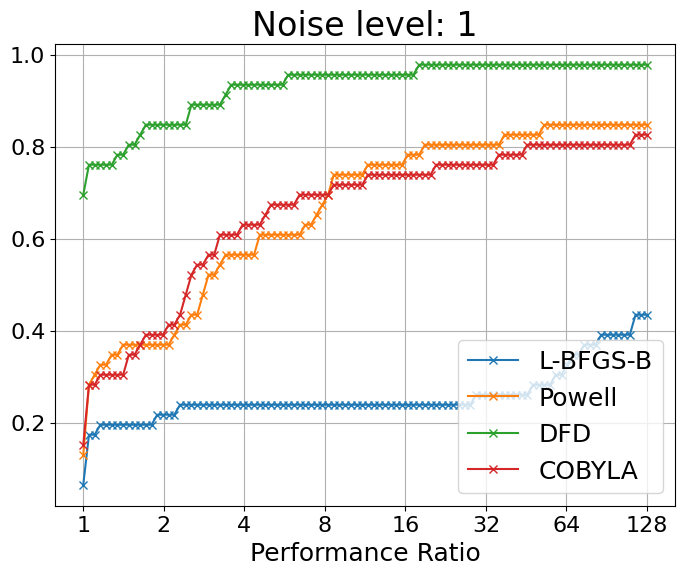

Noise Level: 0.1
\begin{table}[htbp]
\centering
\begin{tabular}{|l|r|r|r|r|r|r|}
\hline
Problem    & Dimension  & Noise  & L-BFGS-B   & Powell     & GDF        & COBYLA     & \\
\hline
ALLINITU   & 4          & 0.1    &  1.300e+01 &  5.759e+00 & \textbf{ 5.747e+00} &  5.781e+00 \\
ARWHEAD    & 100        & 0.1    &  2.970e+02 &  1.362e+00 & \textbf{ 5.627e-02} &  7.282e-02 \\
BARD       & 3          & 0.1    &  4.168e+01 & \textbf{ 2.551e-02} &  2.889e-02 &  5.622e-01 \\
BDQRTIC    & 100        & 0.1    &  2.170e+04 & \textbf{ 3.799e+02} &  4.599e+02 &  3.808e+02 \\
BOX3       & 3          & 0.1    &  1.885e+00 &  2.260e-03 & \textbf{ 4.879e-05} &  2.285e-03 \\
BOXPOWER   & 100        & 0.1    &  8.662e+02 &  5.246e+00 & \textbf{ 2.397e-01} &  5.672e+00 \\
BRKMCC     & 2          & 0.1    &  5.990e+00 & \textbf{-9.345e+09} &  1.692e-01 &  1.969e+00 \\
BROWNAL    & 100        & 0.1    &  2.525e+05 &  9.653e+02 & \textbf{ 4.033e-02} &  3.371e+01 \\
COSINE     & 10         & 0.1    &  7.8

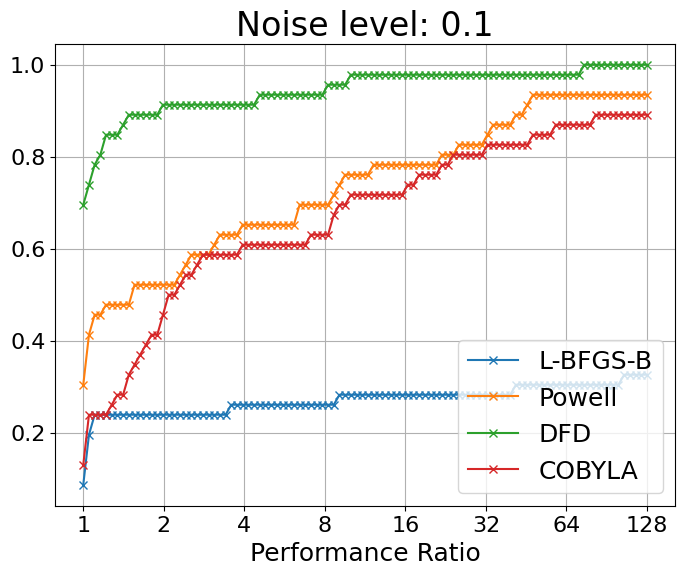

Noise Level: 0.01
\begin{table}[htbp]
\centering
\begin{tabular}{|l|r|r|r|r|r|r|}
\hline
Problem    & Dimension  & Noise  & L-BFGS-B   & Powell     & GDF        & COBYLA     & \\
\hline
ALLINITU   & 4          & 0.01   &  1.300e+01 &  5.749e+00 & \textbf{ 5.745e+00} &  5.748e+00 \\
ARWHEAD    & 100        & 0.01   &  2.970e+02 &  1.263e-01 & \textbf{ 1.753e-02} &  2.858e-02 \\
BARD       & 3          & 0.01   &  4.168e+01 &  1.370e-02 & \textbf{ 1.045e-02} &  2.890e-02 \\
BDQRTIC    & 100        & 0.01   &  2.170e+04 & \textbf{ 3.790e+02} &  4.607e+02 &  3.791e+02 \\
BOX3       & 3          & 0.01   &  1.885e+00 &  4.378e-03 &  1.743e-04 & \textbf{ 2.210e-08} \\
BOXPOWER   & 100        & 0.01   &  8.662e+02 &  2.677e+00 & \textbf{ 2.193e-01} &  7.985e-01 \\
BRKMCC     & 2          & 0.01   &  5.990e+00 & \textbf{ 1.691e-01} &  1.692e-01 &  3.372e-01 \\
BROWNAL    & 100        & 0.01   &  1.904e+05 &  8.737e+02 & \textbf{ 2.565e-02} &  3.208e+01 \\
COSINE     & 10         & 0.01   &  7.

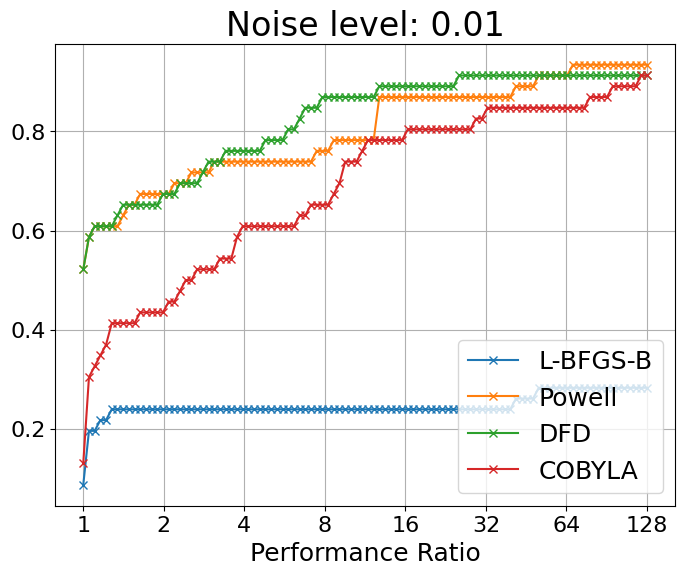

Noise Level: 0.001
\begin{table}[htbp]
\centering
\begin{tabular}{|l|r|r|r|r|r|r|}
\hline
Problem    & Dimension  & Noise  & L-BFGS-B   & Powell     & GDF        & COBYLA     & \\
\hline
ALLINITU   & 4          & 0.001  &  1.300e+01 &  5.745e+00 & \textbf{ 5.744e+00} &  5.746e+00 \\
ARWHEAD    & 100        & 0.001  &  2.970e+02 &  9.550e-03 &  1.434e-02 & \textbf{ 8.688e-03} \\
BARD       & 3          & 0.001  &  4.168e+01 &  1.338e-02 & \textbf{ 9.998e-03} &  1.183e-02 \\
BDQRTIC    & 100        & 0.001  &  2.170e+04 & \textbf{ 3.788e+02} &  4.606e+02 &  3.788e+02 \\
BOX3       & 3          & 0.001  &  1.885e+00 & \textbf{ 3.134e-05} &  3.475e-04 &  4.670e-04 \\
BOXPOWER   & 100        & 0.001  &  8.662e+02 & \textbf{ 9.058e-03} &  2.144e-01 &  2.066e-01 \\
BRKMCC     & 2          & 0.001  &  5.990e+00 & \textbf{ 1.691e-01} &  1.693e-01 &  1.976e-01 \\
BROWNAL    & 100        & 0.001  &  2.525e+05 &  8.385e+02 & \textbf{ 2.210e-02} &  3.633e+00 \\
COSINE     & 10         & 0.001  &  7

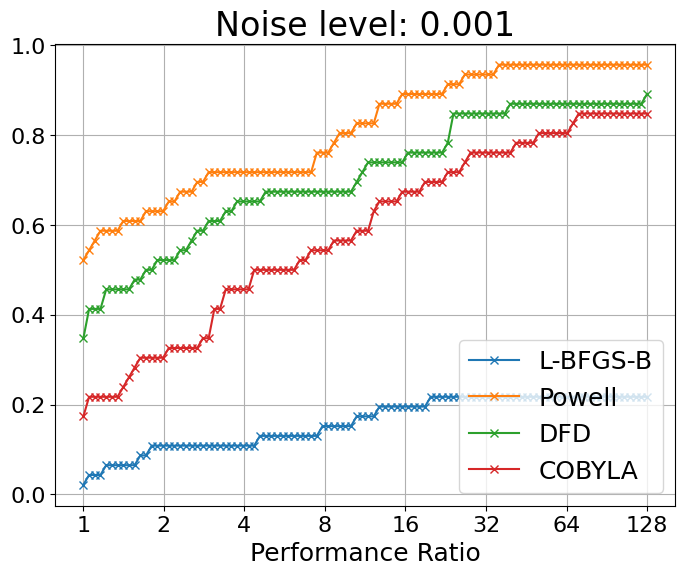

In [2]:
# Example: building problem
import pycutest
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import fmin
from scipy import optimize
import dfree 
import handcode
import importlib
importlib.reload(dfree)
importlib.reload(handcode)
import dfree as drf
np.random.seed(42)

# Define methods
methods = {"L-BFGS-B": "L-BFGS-B",
    "Powell": "Powell",
    "GDF": "GDF",
    # "GDF-BFGS": "GDF-BFGS",
    "COBYLA":"COBYLA"
}
# Define problemss
problems = { "ALLINITU": [{"sifParams": None}],
"ARWHEAD": [ {"sifParams": {'N': 100}}],
"BARD":[{"sifParams": None}],
"BDQRTIC": [{"sifParams": {'N': 100}}],
"BOX3":[{"sifParams": None}],
"BOXPOWER": [ {"sifParams": {'N': 100}}],
"BRKMCC":[{"sifParams": None}],
"BROWNAL": [ {"sifParams": {'N': 100}}],
"COSINE": [ {"sifParams": {'N': 10}}],
"CRAGGLVY": [ {"sifParams": {'M': 1}}],
"CURLY30": [ {"sifParams": {'N': 100}}],
"DIXMAANB": [ {"sifParams": {'M': 5}}, {"sifParams": {'M': 30}}],
"DQRTIC": [ {"sifParams": {'N': 10}}],
"ENGVAL1": [ {"sifParams": {'N': 50}},{"sifParams": {'N': 100}}],
"FLETBV3M": [ {"sifParams": {'N': 10}},{"sifParams": {'N': 100}}],
"FLETCBV2": [ {"sifParams": {'N': 10}}],
"FLETCBV3": [ {"sifParams": {'N': 10}},{"sifParams": {'N': 100}}],
"FLETCHCR": [ {"sifParams": {'N': 100}}],
"GULF":[{"sifParams": None}],
"HIMMELBCLS":[{"sifParams": None}],
"HIMMELBG":[{"sifParams": None}],
"HIMMELBH":[{"sifParams": None}],
"HUMPS":[{"sifParams": None}],
"LOGHAIRY":[{"sifParams": None}],
"NCB20B":[{"sifParams": {'N': 100}}],
"NONDIA":[{"sifParams": {'N': 100}}],
"NONDQUAR":[{"sifParams":{'N': 100}}],
"PENALTY3":[{"sifParams":{'N/2': 25}}],
"POWELLSG":[{"sifParams": {'N': 4}}],
"ROSENBRTU":[{"sifParams": None}],
"SENSORS":[{"sifParams":{'N': 3}}],
"SISSER":[{"sifParams": None}],
"SPARSINE":[{"sifParams": {'N': 100}}],
"TOINTGSS":[{"sifParams": {'N': 50}},{"sifParams": {'N': 100}}],
"TQUARTIC":[{"sifParams": {'N': 100}}],
"TRIDIA":[{"sifParams": {'N': 100}}],
"VARDIM":[{"sifParams": {'N': 10}}],
"VAREIGVL":[{"sifParams": {'N': 49}},{"sifParams": {'N': 99}}],
"WOODS":[{"sifParams": {'NS' : 25}}],
"ZANGWIL2":[{"sifParams": None}]}
# Noise levels
import re  
noise_levels = [1,1e-1,1e-2,1e-3]
# Run methods on problems with different noise levels
all_results={i:[] for i in range(len(noise_levels))}
index=-1;
for level in noise_levels:
    index=index+1
    counts = {method_name: 0 for method_name in methods}
    print(f"Noise Level: {level}")
    method_names = list(methods.keys())
    print("\\begin{table}[htbp]")
    print("\\centering")
    print("\\begin{tabular}{|l|r|r|" + "r|" * len(method_names) + "}")
    print("\\hline")
    print("{:<10} & {:<10} & {:<6}".format("Problem", "Dimension", "Noise"), end=" & ")
    for method_name in method_names:
        print("{:<10}".format(methods[method_name]), end=" & ")
    print("\\\\")
    print("\\hline")
    for problem_name, problem_params_list in problems.items():
        for problem_params in problem_params_list:
            problem = pycutest.import_problem(problem_name, sifParams=problem_params['sifParams'])
            initial_x = problem.x0
            n = len(initial_x)
            maxcount = 200 * n
            # Inject noise into the objective function
            def f(x):
                token=np.random.uniform(low=-1, high=0)
                if token<0:
                    noise=np.random.uniform(low=-level, high=level)
                else:
                    noise=np.random.uniform(low=-level, high=level)
                    #noise = np.random.triangular(left=-1*level, mode=1*level, right=2*level)
                return problem.obj(x) + noise
            results = []
            results1 = minimize(problem.obj, initial_x, method='Powell', options={'maxfev': maxcount})
            fmin1=problem.obj(results1.x)
            x, fun_all, count_all = handcode.DFB(problem.obj,problem.obj, maxcount, initial_x, delta=1e-2)
            fmin2= min(fun_all)
            funoptim=min(fmin1,fmin2)
            # print(funoptim)
            rr = {}
            for method_name, method_value in methods.items():  
                if method_value == "L-BFGS-B":
                    # Using SciPy optimization methods
                    result = minimize(f, initial_x, method='L-BFGS-B', options={'maxfun': maxcount})
                    results.append(problem.obj(result.x))
                    rr[method_name] =problem.obj(result.x)-funoptim
                if method_value == "Powell":
                    function_values_powel = [problem.obj(initial_x)]
                    def callback_function(x, *args):
                        function_values_powel.append(problem.obj(x))
                    # Using SciPy optimization methods
                    result = minimize(f, initial_x, method='Powell', options={'maxfev': maxcount},callback=callback_function)
                    #results.append(problem.obj(result.x))
                    results.append(min(function_values_powel))
                    rr[method_name] =min(function_values_powel)-funoptim
                if method_value == "COBYLA":
                    # Using SciPy optimization methods
                    result = minimize(f, initial_x, method='COBYLA', options={'maxiter': maxcount})
                    results.append(problem.obj(result.x))
                    rr[method_name] =problem.obj(result.x)-funoptim
                if method_value == "GDF":
                    initcount=2*len(initial_x)
                    level_esti=noise_esti(f, initial_x, initcount)
                    # x_min, f_min, ftrue_values, fcount, countall = drf.gradient_descent(f, problem.obj, initial_x, maxcount, level)
                    beta=0;
                    x_min, f_min, ftrue_values, fcount, countall = drf.gradient_descent_acce(f, problem.obj, initial_x, maxcount, level_esti,initcount,beta)
                    result = min(ftrue_values)
                    results.append(result)  # Placeholder for your custom gradient descent method
                    rr[method_name] =result-funoptim
                if method_value == "GDF-HB":
                    initcount=2*len(initial_x)
                    level_esti=noise_esti(f, initial_x, initcount)
                    # x_min, f_min, ftrue_values, fcount, countall = drf.gradient_descent(f, problem.obj, initial_x, maxcount, level)
                    beta=0.2;
                    x_min, f_min, ftrue_values, fcount, countall = drf.gradient_descent_acce(f, problem.obj, initial_x, maxcount, level_esti,initcount,beta)
                    result = min(ftrue_values)
                    results.append(result)  # Placeholder for your custom gradient descent method
                    rr[method_name] =result-funoptim
                if method_value == "GDF-BFGS":
                    initcount=2*len(initial_x)
                    level_esti=noise_esti(f, initial_x, initcount)
                    # x_min, f_min, ftrue_values, fcount, countall = drf.gradient_descent(f, problem.obj, initial_x, maxcount, level)
                    x_min, f_min, ftrue_values, fcount, countall = drf.gradient_descent_bfgs(f, problem.obj, initial_x, maxcount, level_esti,initcount)
                    result = min(ftrue_values)
                    results.append(result)  # Placeholder for your custom gradient descent method
                    rr[method_name] =result-funoptim
            all_results[index].append(rr)
            min_index = np.argmin(results)
            lowest_method = list(methods.keys())[min_index]
            counts[lowest_method] += 1
            # Print the results, bolding the smallest function value
            print("{:<10} & {:<10} & {:<6}".format(problem_name, n, level), end=" & ")
            for i, val in enumerate(results):
                if i == min_index:
                    print("\\textbf{{{:10.3e}}}".format(val), end=" ")
                else:
                    print("{:10.3e}".format(val), end=" ")
                if i != len(results) - 1:
                    print("&", end=" ")
            print("\\\\")
    print("\\hline")
    print("\\end{tabular}")
    print("\\caption{Results for Noise Level " + str(level) + "}")
    print("\\label{table:noise_level_" + str(level) + "}")
    print("\\end{table}")
    print("\nCounts for each method:")
    for method, count in counts.items():
        print(f"{method}: {count}")    
    plot_performance_profiles(all_results[index], methods,noise_levels[index])
